<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [111]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [112]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [113]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [114]:
df.shape
df.dtypes
#plt.scatter(df.Principal, df.age)

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Convert to date time object


In [115]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()
#df.dtypes

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [116]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [117]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

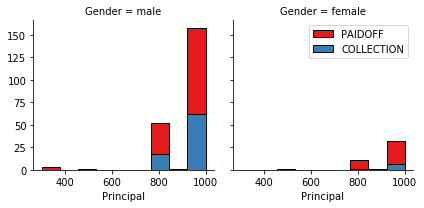

In [118]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

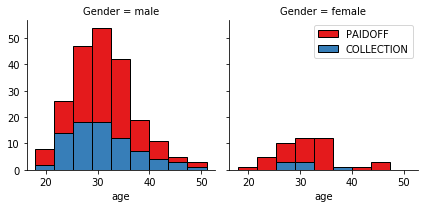

In [119]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


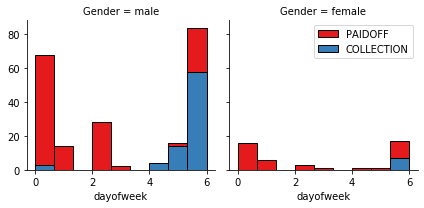

In [120]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [121]:
df.dayofweek.unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [122]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [123]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [124]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [125]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [126]:
#df = df[df.Principal >= 600]

#### Features before One Hot Encoding


In [127]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [128]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [129]:
X = Feature
X[0:5]
#type(X)

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [130]:
y = df['loan_status']
y[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

split to train/test

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 4)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [132]:
##standardization for  X_train(convert to X_train_st)
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_st = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

##standardization for  X_test(convert to X_test_st) by same scaler of X_train
X_test_st = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_train_st.describe()


'\nX_train_st = X_train_st.values\nX_train_st = X_test_st.values\ny_train = y_train.values\ny_test = y_test.values\n\n'

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [134]:
#define a function for k_neighbors_classifier
def knn(k, X_train, y_train):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    return neigh


max accuracy is 0.7857142857142857 (k = 7)


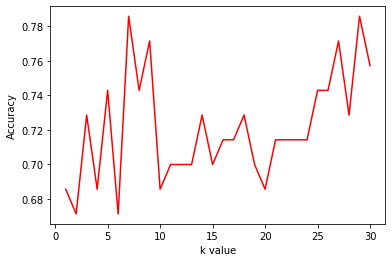

In [135]:
Max_K = 30
K = np.arange(1, Max_K+1, 1) 
Test_Accuracy = []
Max_Accuracy = ["key", 0.0]
for k in K:
    kneigh = knn(k, X_train_st, y_train)
    y_hat = kneigh.predict(X_test_st)
    acc = metrics.accuracy_score(y_test,y_hat)

    if acc > Max_Accuracy[1]:
        Max_Accuracy[0] = k
        Max_Accuracy[1] = acc

    Test_Accuracy.append(acc)

#del Test_Accuracy[0]
 

plt.plot(K, Test_Accuracy,'r-')
plt.xlabel("k value")
plt.ylabel("Accuracy")



print("max accuracy is", Max_Accuracy[1], "(k = {})".format(Max_Accuracy[0]))

In [136]:
kneigh = knn(7, X_train_st, y_train)
y_hat = kneigh.predict(X_test_st)


print("Train set Accuracy: ", metrics.accuracy_score(y_train, kneigh.predict(X_train_st)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.8115942028985508
Test set Accuracy:  0.7857142857142857


# Decision Tree


In [137]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

max accuracy is 0.6428571428571429 (depth = 5)


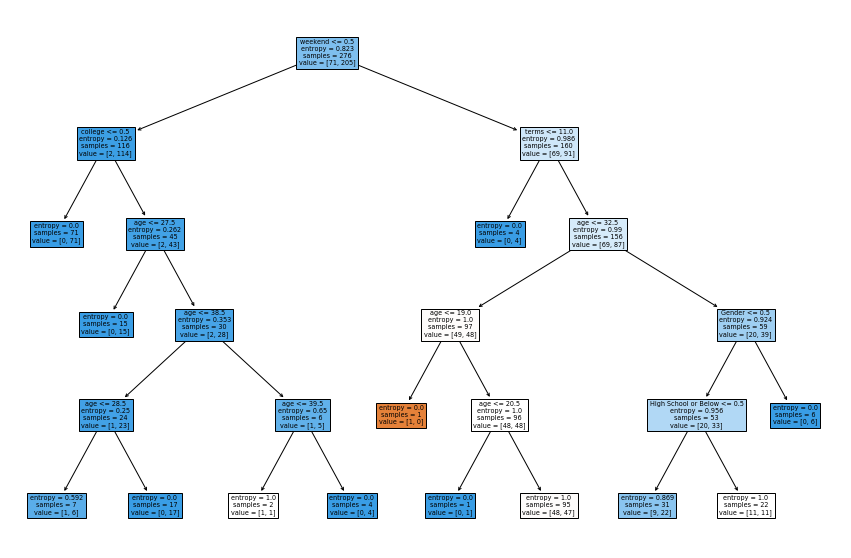

In [138]:
depth_array = np.arange(3, 6, 1)
Max_Accuracy_Tree = ["key", 0.0]
for depth_value in depth_array:
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth_value)
    loanTree.fit(X_train, y_train)
    #Prediction
    predTree = loanTree.predict(X_test)
    tree_accuracy = metrics.accuracy_score(y_test,predTree)

    if tree_accuracy > Max_Accuracy_Tree[1]:
        Max_Accuracy_Tree[0] = depth_value
        Max_Accuracy_Tree[1] = tree_accuracy
        loanTree_max = loanTree

print("max accuracy is", Max_Accuracy_Tree[1], "(depth = {})".format(Max_Accuracy_Tree[0]))
#visualization
plt.figure(figsize=(15, 10))
plot_tree(loanTree_max, feature_names=X.columns,  filled=True)
plt.show()

# Support Vector Machine


In [139]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_st, y_train) 

predSVM = clf.predict(X_test_st)

svm_train_accuracy = metrics.accuracy_score(y_train, clf.predict(X_train_st))
svm_test_accuracy = metrics.accuracy_score(y_test,predSVM)

print("Train Accuracy by SVM: {}".format(svm_train_accuracy))
print("Test Accuracy by SVM: {}".format(svm_test_accuracy))

Train Accuracy by SVM: 0.7427536231884058
Test Accuracy by SVM: 0.7857142857142857


In [140]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:

    clf = svm.SVC(kernel=k)
    clf.fit(X_train_st, y_train) 

    predSVM = clf.predict(X_test_st)

    svm_train_accuracy = metrics.accuracy_score(y_train, clf.predict(X_train_st))
    svm_test_accuracy = metrics.accuracy_score(y_test,predSVM)

    results[k] = [svm_train_accuracy, svm_test_accuracy]

print("kernel/train accuracy/test accuracy:\n{}".format(results))

kernel/train accuracy/test accuracy:
{'linear': [0.7427536231884058, 0.7857142857142857], 'poly': [0.7898550724637681, 0.7714285714285715], 'rbf': [0.782608695652174, 0.7428571428571429], 'sigmoid': [0.7028985507246377, 0.7428571428571429]}


# Logistic Regression


In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_st,y_train)
LR
predLR = LR.predict(X_test_st)

LR_train_accuracy = metrics.accuracy_score(y_train, LR.predict(X_train_st))
LR_test_accuracy = metrics.accuracy_score(y_test,predLR)

print("Train Accuracy by LR: {}".format(LR_train_accuracy))
print("Test Accuracy by LR: {}".format(LR_test_accuracy))


Train Accuracy by LR: 0.7644927536231884
Test Accuracy by LR: 0.7142857142857143


In [142]:
#yhat_prob = LR.predict_proba(X_test_st)
#yhat_prob

In [143]:
# Seeking the best C value.
for c in [0.01, 0.1, 1.0, 10.0]:
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train_st,y_train)
    predLR = LR.predict(X_test_st)

    LR_train_accuracy = metrics.accuracy_score(y_train, LR.predict(X_train_st))
    LR_test_accuracy = metrics.accuracy_score(y_test,predLR)

    print(f"C parameter : {c}")
    print("Train Accuracy by LR: {}".format(LR_train_accuracy))
    print("Test Accuracy by LR: {}".format(LR_test_accuracy))

C parameter : 0.01
Train Accuracy by LR: 0.7644927536231884
Test Accuracy by LR: 0.7142857142857143
C parameter : 0.1
Train Accuracy by LR: 0.7644927536231884
Test Accuracy by LR: 0.7285714285714285
C parameter : 1.0
Train Accuracy by LR: 0.7681159420289855
Test Accuracy by LR: 0.7285714285714285
C parameter : 10.0
Train Accuracy by LR: 0.7644927536231884
Test Accuracy by LR: 0.7142857142857143


# Model Evaluation using Test set


In [144]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [145]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

'wget' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


### Load Test set for evaluation


In [146]:
test_df = pd.read_csv('loan_test.csv')

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
#
# To convert male to 0 and female to 1:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [164]:
X2 = Feature_test
y2 = test_df['loan_status'].values
len(X2) == len(y2)

True

In [165]:
#standardization
X2_st = pd.DataFrame(scaler.transform(X2), columns=X2.columns)
X2.describe()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,914.814815,21.888889,31.833333,0.203704,0.629630,0.148148,0.388889,0.425926
std,174.190751,8.818220,5.992920,0.406533,0.487438,0.358583,0.492076,0.499126
min,300.000000,7.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,800.000000,15.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1000.000000,30.000000,30.500000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1000.000000,30.000000,36.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1000.000000,30.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
###Learning by train data(X_train_st) with best parameters and predicting from test data(X2_st)
#KNN
knn_test_predict = kneigh.predict(X2_st)

#Decision tree
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
loanTree.fit(X_train, y_train)
dt_test_predict = loanTree.predict(X2_st)

#Suport vector machine
clf = svm.SVC(kernel='linear')
clf.fit(X_train_st, y_train) 
svm_test_predict = clf.predict(X2_st)
#Logistic regression

LR = LogisticRegression(C=0.1, solver='liblinear').fit(X_train_st,y_train)
lr_test_predict = LR.predict(X2_st)

In [178]:
#Jaccardindex
print("Jaccard Index:")
predictions = [knn_test_predict, dt_test_predict, svm_test_predict, lr_test_predict]
for predict_values in predictions:
    js = jaccard_score(y2, predict_values, pos_label='PAIDOFF')
    print(js)

Jaccard Index:
0.6981132075471698
0.7407407407407407
0.7407407407407407
0.7547169811320755


In [177]:
#F1 score
print("F1 score:")
for predict_values in predictions:
    f1 = f1_score(y2, predict_values, pos_label='PAIDOFF')
    print(f1)

F1 score:
0.8222222222222222
0.851063829787234
0.851063829787234
0.8602150537634409


In [176]:
#logloss
lr_test_predict_prob = LR.predict_proba(X2_st)

logloss = log_loss(y2, lr_test_predict_prob)
print(f"log_loss value : {logloss}")

log_loss value : 0.47889595786700995


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.698   | 0.822    | NA      |
| Decision Tree      | 0.741   | 0.851    | NA      |
| SVM                | 0.741   | 0.851    | NA      |
| LogisticRegression | 0.755   | 0.860    | 0.479   |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
